In [ ]:
import pandas as pd
import torch
import numpy as np
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm

In [ ]:
data = pd.read_csv('HDHI Admission data.csv')

In [ ]:
data.head(5)

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-4-c8d2726e8f2d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().iloc[1:-16,-16:],annot=True)


<Axes: >

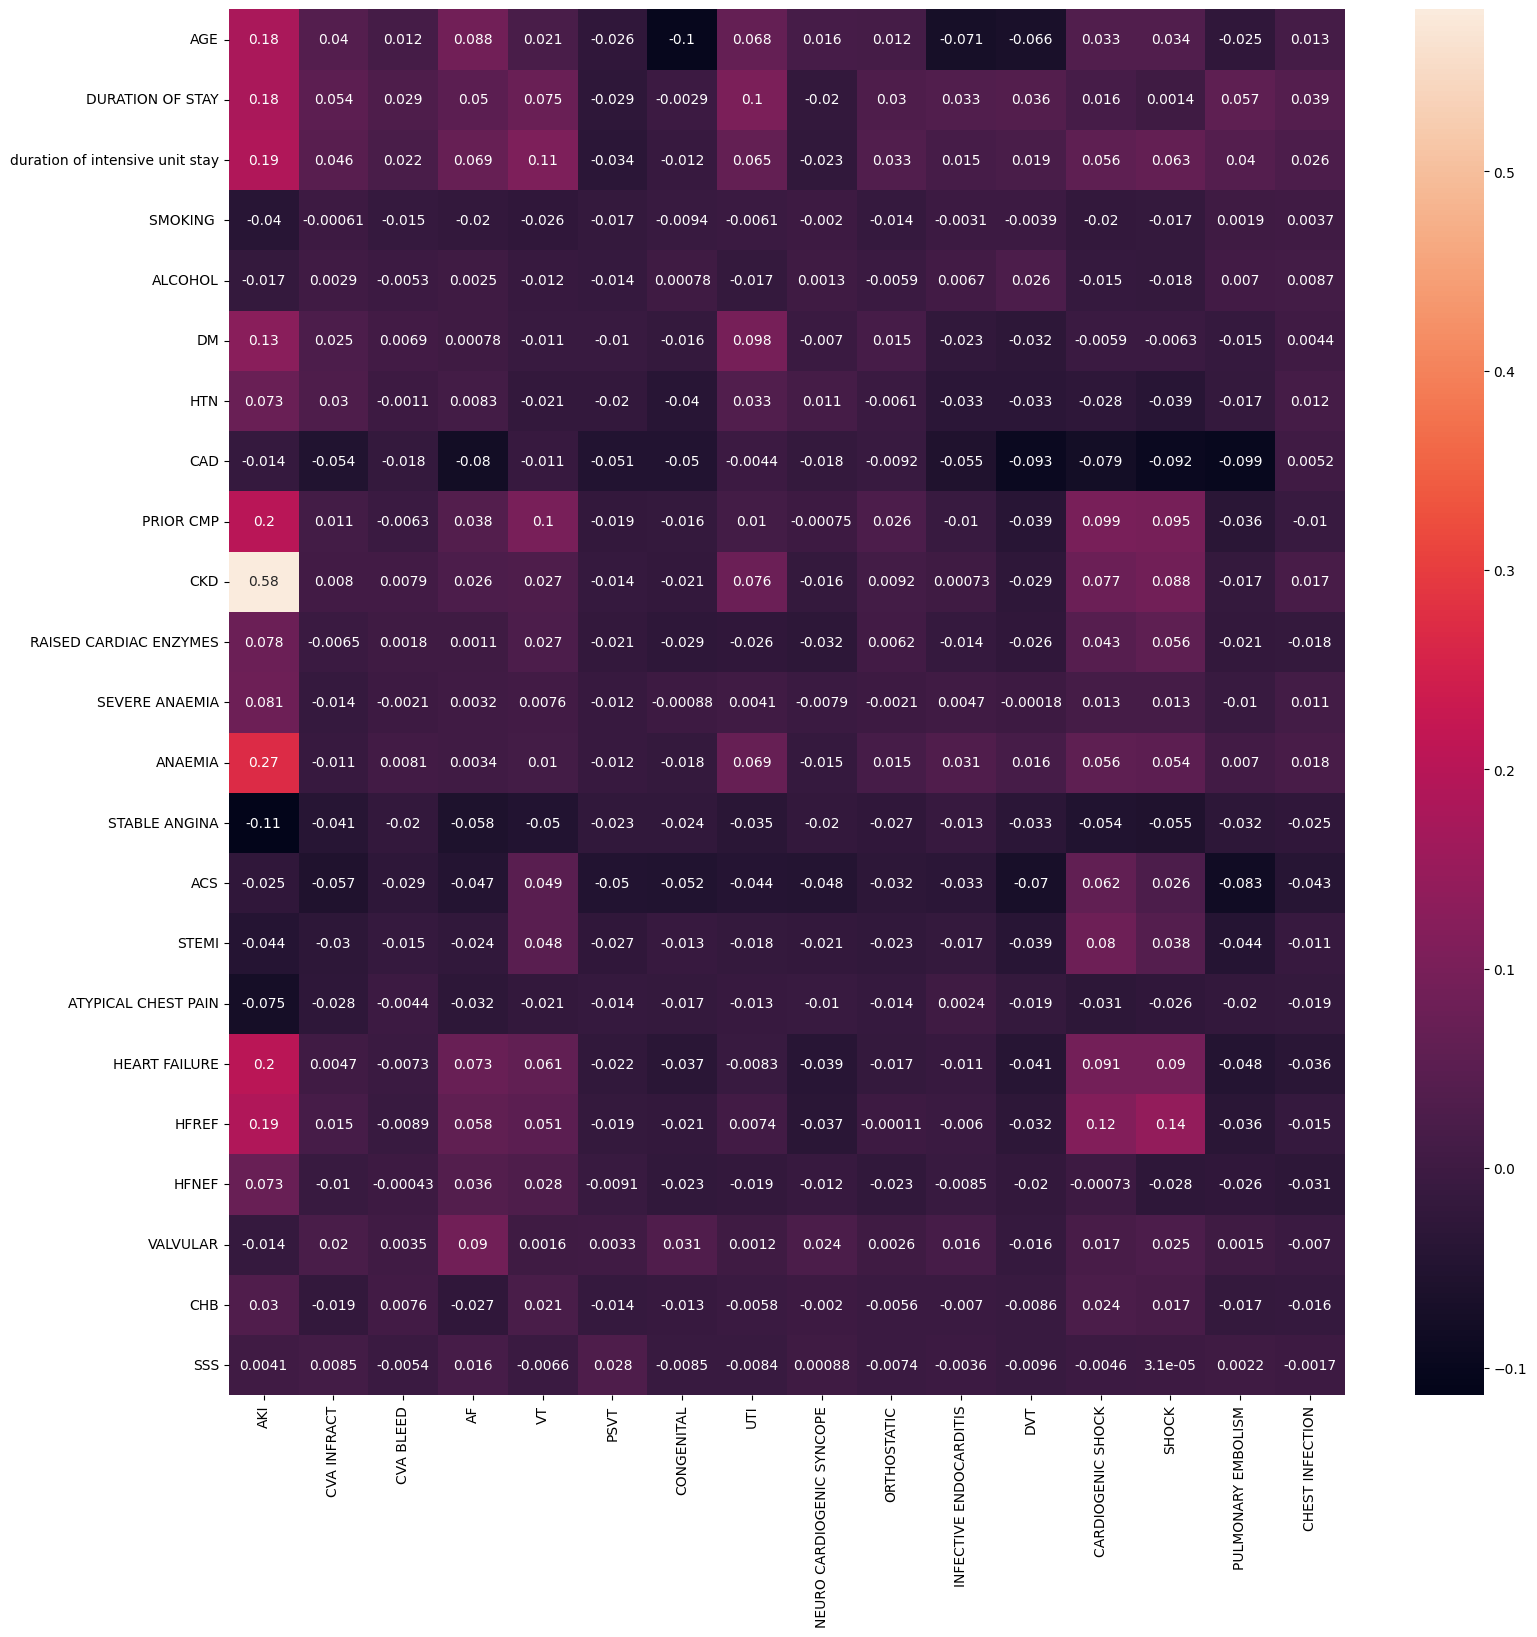

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))
sns.heatmap(data.corr().iloc[1:-16,-16:],annot=True)

In [ ]:
data.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION'],
      dtype='object')

In [ ]:
real_data = data.drop (columns=['SNO','MRD No.','D.O.A', 'D.O.D','RURAL','TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY','duration of intensive unit stay', 'OUTCOME', 'BNP','EF',])

In [ ]:
real_data['HB'].replace('EMPTY', np.nan, inplace=True)
real_data['TLC'].replace('EMPTY', np.nan, inplace=True)
real_data['PLATELETS'].replace('EMPTY', np.nan, inplace=True)
real_data['UREA'].replace('EMPTY', np.nan, inplace=True)
real_data['CREATININE'].replace('EMPTY', np.nan, inplace=True)
real_data['GLUCOSE'].replace('EMPTY', np.nan, inplace=True)

In [ ]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15756 entries, 0 to 15755
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   AGE                        15756 non-null  int64 
 1   GENDER                     15756 non-null  object
 2   SMOKING                    15756 non-null  int64 
 3   ALCOHOL                    15756 non-null  int64 
 4   DM                         15756 non-null  int64 
 5   HTN                        15756 non-null  int64 
 6   CAD                        15756 non-null  int64 
 7   PRIOR CMP                  15756 non-null  int64 
 8   CKD                        15756 non-null  int64 
 9   HB                         15500 non-null  object
 10  TLC                        15466 non-null  object
 11  PLATELETS                  15462 non-null  object
 12  GLUCOSE                    14811 non-null  object
 13  UREA                       15512 non-null  object
 14  CREATI

In [ ]:
real_data['CHEST INFECTION'] = real_data['CHEST INFECTION'].astype(float)
real_data['HB'] = real_data['HB'].astype(float)
real_data['TLC'] = real_data['TLC'].astype(float)
real_data['PLATELETS'] = real_data['PLATELETS'].astype(float)
real_data['GLUCOSE'] = real_data['GLUCOSE'].astype(float)
real_data['UREA'] = real_data['UREA'].astype(float)
real_data['CREATININE'] = real_data['CREATININE'].astype(float)


In [ ]:
real_data.apply(pd.isnull).sum()

AGE                            0
GENDER                         0
SMOKING                        0
ALCOHOL                        0
DM                             0
HTN                            0
CAD                            0
PRIOR CMP                      0
CKD                            0
HB                           256
TLC                          290
PLATELETS                    294
GLUCOSE                      945
UREA                         244
CREATININE                   251
RAISED CARDIAC ENZYMES         0
SEVERE ANAEMIA                 0
ANAEMIA                        0
STABLE ANGINA                  0
ACS                            0
STEMI                          0
ATYPICAL CHEST PAIN            0
HEART FAILURE                  0
HFREF                          0
HFNEF                          0
VALVULAR                       0
CHB                            0
SSS                            0
AKI                            0
CVA INFRACT                    0
CVA BLEED 

In [ ]:
len(real_data)

15756

In [ ]:
real_data = real_data.dropna()

In [ ]:
len(real_data)

14621

In [ ]:
real_data['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
real_data['GENDER'] = label_encoder.fit_transform(real_data['GENDER'])


In [ ]:
real_data.columns

Index(['AGE', 'GENDER', 'SMOKING ', 'ALCOHOL', 'DM', 'HTN', 'CAD', 'PRIOR CMP',
       'CKD', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE',
       'RAISED CARDIAC ENZYMES', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA',
       'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF',
       'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED',
       'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE',
       'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK',
       'SHOCK', 'PULMONARY EMBOLISM', 'CHEST INFECTION'],
      dtype='object')

<Axes: >

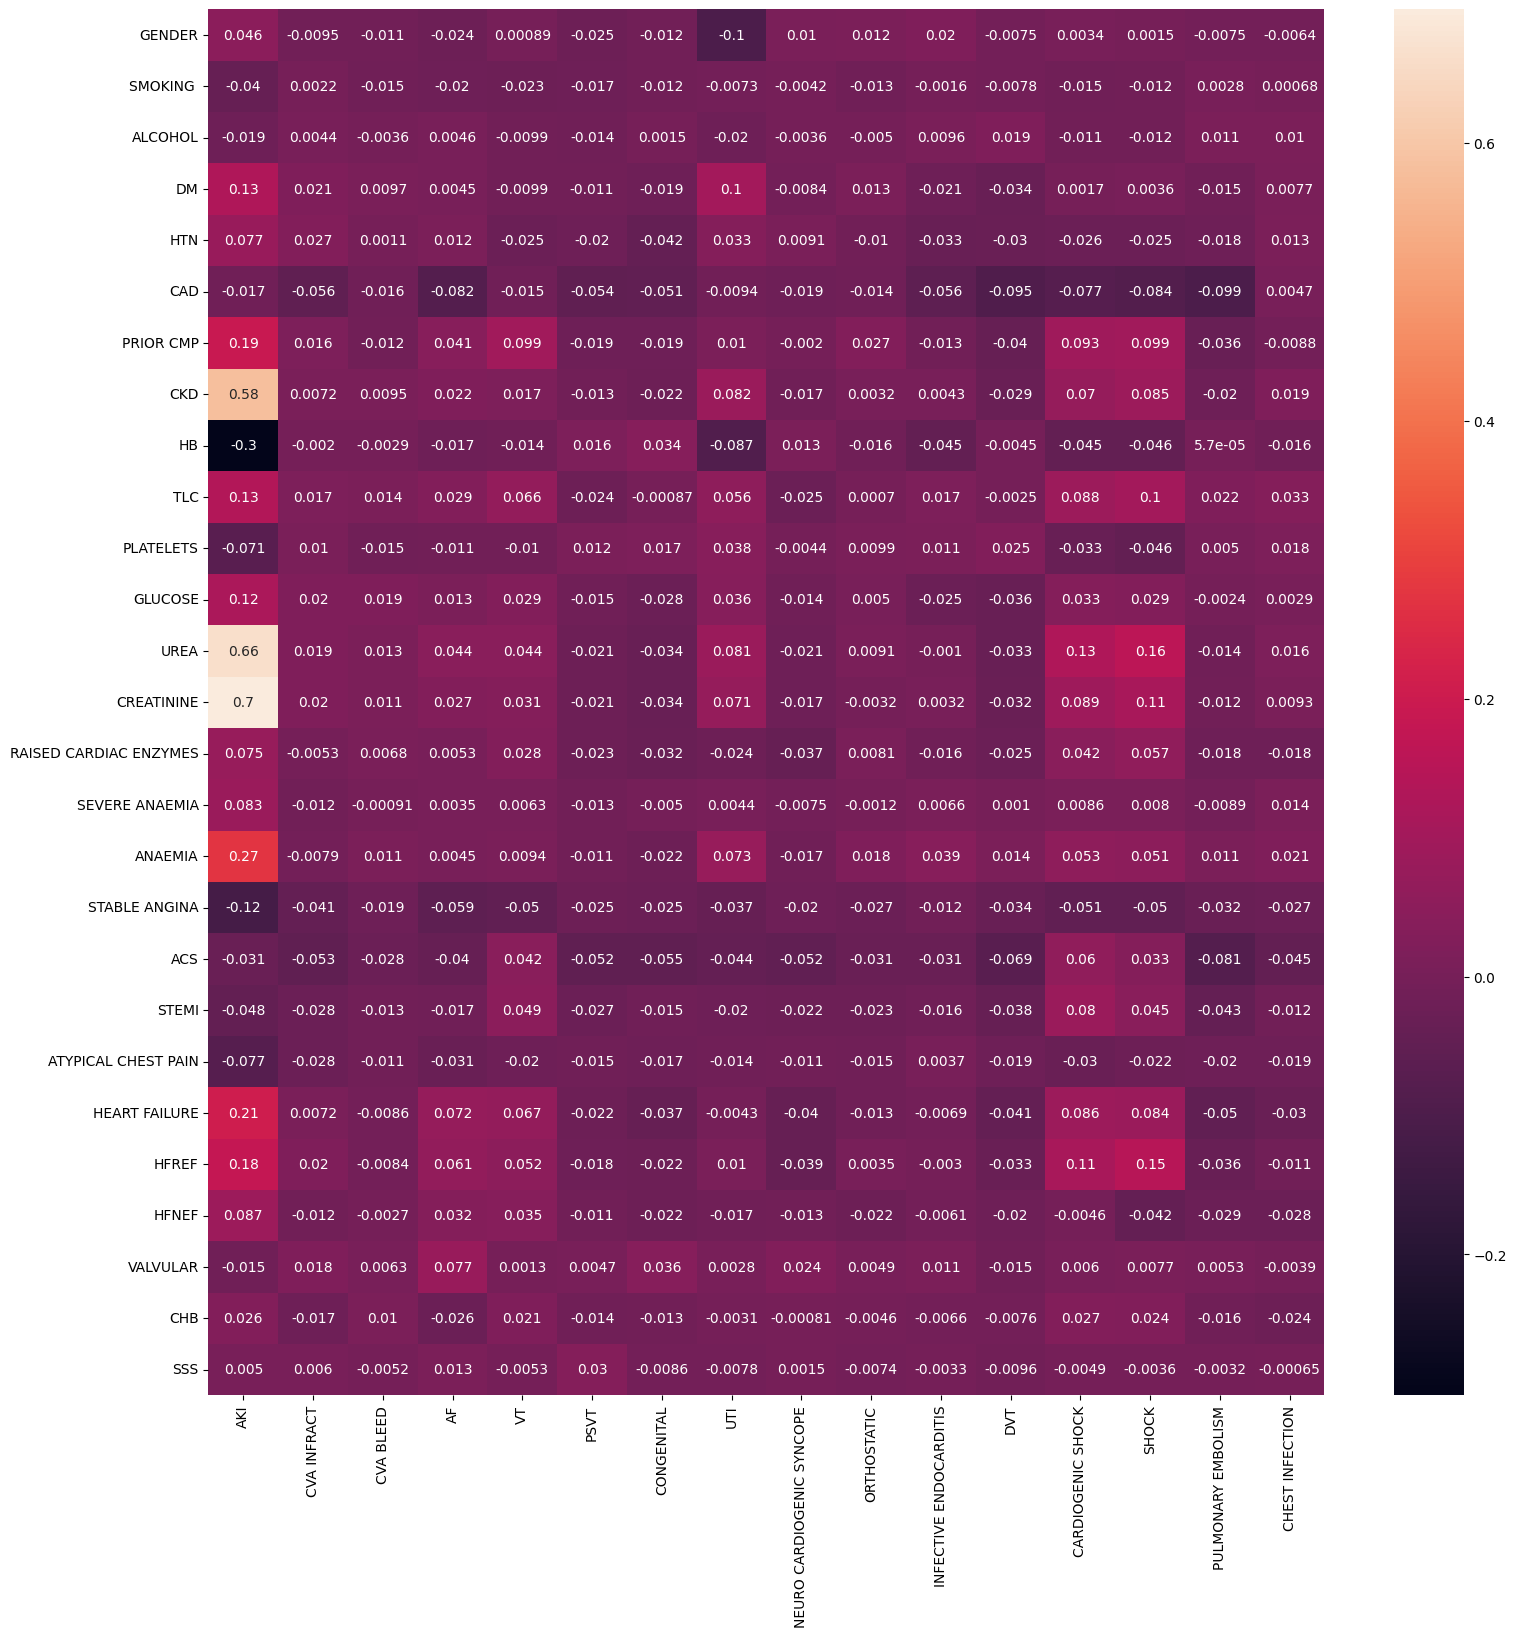

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))
sns.heatmap(real_data.corr().iloc[1:-16,-16:],annot=True)

In [ ]:
class Getdataset(Dataset):
    def __init__(self,real_data):
        self.data = real_data

    def __len__(self):
        return len(self.data) - 1

    def __getitem__(self,idx):
        x = self.data[idx:idx+1].values
        inp = torch.tensor(x[0][0:16],dtype=torch.float32)
        n = []
        for i in x[0][16:]:
          if i == 0:
            n.append(1)
          else:
            n.append(0)
        out = torch.tensor(n,dtype=torch.float32)

        return inp,out

In [ ]:
t_data = Getdataset(real_data)

In [ ]:
t_data[3254][0].size(),t_data[3254][1].size()

(torch.Size([16]), torch.Size([28]))

In [ ]:
import torch
import torch.nn as nn

class CustomANN(nn.Module):
    def __init__(self):
        super(CustomANN, self).__init__()
        self.lay1 = nn.Linear(16, 64)
        self.relu = nn.ReLU()
        self.drop = nn.Dropout(p=0.2)
        self.lay2 = nn.Linear(64, 128)
        self.relu2 = nn.ReLU()
        self.lay3 = nn.Linear(128, 256)
        self.lay4 = nn.Linear(256, 64)
        self.lay5 = nn.Linear(64,28)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      x = self.lay1(x)
      x = self.relu(x)
      x = self.drop(x)
      x = self.lay2(x)
      x = self.relu(x)
      x = self.lay3(x)
      x = self.relu(x)
      x = self.lay4(x)
      x = self.relu(x)
      x = self.lay5(x)
      x = self.sigmoid(x)
      return x

model = CustomANN()
print(model)


CustomANN(
  (lay1): Linear(in_features=16, out_features=64, bias=True)
  (relu): ReLU()
  (drop): Dropout(p=0.2, inplace=False)
  (lay2): Linear(in_features=64, out_features=128, bias=True)
  (relu2): ReLU()
  (lay3): Linear(in_features=128, out_features=256, bias=True)
  (lay4): Linear(in_features=256, out_features=64, bias=True)
  (lay5): Linear(in_features=64, out_features=28, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
train_dataloader = DataLoader(t_data,batch_size=30,shuffle=True)

In [ ]:
ele = next(iter(train_dataloader))

In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
device = torch.device("cuda")
model = model.to(device)
device

device(type='cuda')

In [ ]:
model.train()
for i in tqdm(range(10000)):
  losses = []
  for idx,ele in enumerate(train_dataloader):
    ele[0] = ele[0].to(device)
    output = model(ele[0])
    ele[1] = ele[1].to(device)
    loss = loss_fn(output,ele[1])
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    losses.append(loss)
  if i%10 == 0:
    print(sum(losses)/len(losses))

  0%|          | 0/10000 [00:00<?, ?it/s]

tensor(0.1909, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1719, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1646, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1611, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1603, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1602, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1581, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1577, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1581, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1572, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1566, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1562, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1561, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1551, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1553, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1545, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1542, device='cuda:0', grad_fn=<DivBackward0>)
tensor(0.1541, device='cuda:0', grad_fn=<DivBack

KeyboardInterrupt: ignored

In [ ]:
ex = t_data[138]
ex

(tensor([ 39.0000,   1.0000,   0.0000,   0.0000,   0.0000,   0.0000,   0.0000,
           0.0000,   1.0000,  10.6000,   7.2000, 146.0000, 106.0000, 116.0000,
           3.4000,   0.0000]),
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [ ]:
model.eval()
with torch.no_grad():
  w = ex[0].to(device)
  out = model(w)
torch.round(out),out

(tensor([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0'),
 tensor([9.9897e-01, 5.8201e-03, 9.4283e-01, 8.4688e-01, 9.3112e-01, 9.9156e-01,
         9.3209e-01, 9.6045e-01, 9.4903e-01, 9.4804e-01, 9.1357e-01, 9.9633e-01,
         4.7027e-04, 9.7876e-01, 9.8619e-01, 9.7981e-01, 9.9440e-01, 9.9536e-01,
         9.9624e-01, 8.5374e-01, 9.9780e-01, 9.7697e-01, 9.9481e-01, 9.9008e-01,
         9.3261e-01, 9.6392e-01, 9.7763e-01, 9.1521e-01], device='cuda:0'))

In [ ]:
ex[1]

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
torch.save(model.state_dict(),"./bcliodel.pth")